In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('C:/Users/radwa/OneDrive/Desktop/codeclause/Task 1/0_b5ptHu0y7wUeMddy.jpg')

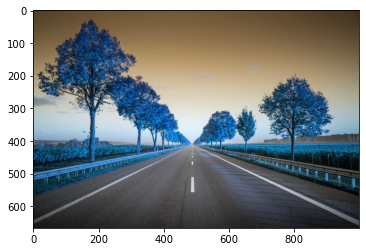

In [3]:
plt.imshow(image)
plt.show()

In [4]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

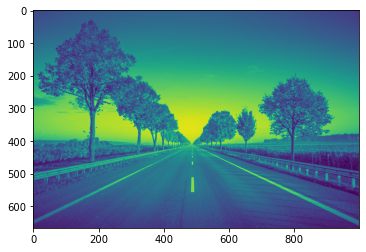

In [5]:
plt.imshow(gray)
plt.show()

In [6]:
blur = cv2.GaussianBlur(gray, (5, 5), 0)

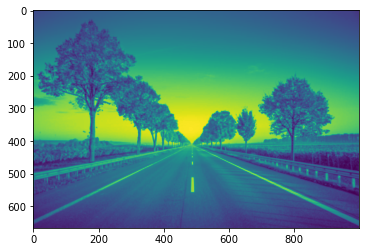

In [7]:
plt.imshow(blur)
plt.show()

In [8]:
low_t = 50
high_t = 150
edges = cv2.Canny(blur, low_t, high_t)

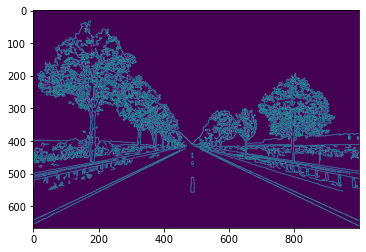

In [9]:
plt.imshow(edges)
plt.show()

In [10]:
mask = np.zeros_like(edges)

In [11]:
height, width = image.shape[:2]
roi_vertices = [(0, height), (width/2, height/2), (width, height)]
mask_color = 255
cv2.fillPoly(mask, np.array([roi_vertices], dtype=np.int32), mask_color)
masked_edges = cv2.bitwise_and(edges, mask)

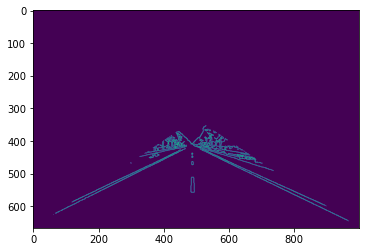

In [12]:
plt.imshow(masked_edges)
plt.show()

In [13]:
lines = cv2.HoughLinesP(masked_edges, rho=6, theta=np.pi/60, threshold=160, minLineLength=40, maxLineGap=25)

In [14]:
line_image = np.zeros_like(image)
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 5)

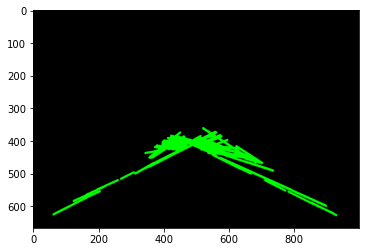

In [17]:
plt.imshow(line_image)
plt.show()

In [15]:
final_image = cv2.addWeighted(image, 1, line_image, 1, 0)

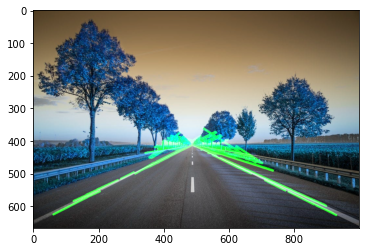

In [16]:
plt.imshow(final_image)
plt.show()